# *Personal medical cost*

Health problems and the high cost of medical services make it an extremely important part of our lives to have health insurance. Not only does it help to cover the cost of any treatment or surgery, but it also gives you the peace of mind that - in the case of an accident - you won't end up with a huge bill that you'll be paying for for the next decade. 

**Columns:**

+ **age**: age of primary beneficiary,
+ **sex**: insurance contractor gender, female, male,
+ **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9,
+ **children**: number of children covered by health insurance / Number of dependents,
+ **smoker**: smoking,
+ **region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest,
+ **charges**: Individual medical costs billed by health insurance.

The above set of variables will not only allow us to build a regression model that determines the value of the dependent variable: charges, but it can also be used to test some interesting statistical hypotheses.

------

## Main goal
+ Build a regression model that determines individual medical costs billed by health insurance.


## Side goal
Using selected statistical tests, check whether: 
+ women and men differ by bmi, smoking or charges,
+ smoking is associated with being overweight,
+ regions differ by the amount of insurance paid.

------

## Table of contents🐱‍💻:

1. Packages and loading data
2. Data types and missing values
3. Making a list of qualitative and quantitative variables
4. Data overview
    1. Qualitative variables
    2. Quantitative variables
5. Testing statistical hypotheses  

------


# Packages and loading data

------

In [1]:
# Packages

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from scipy.stats import kurtosis, skew, shapiro, mannwhitneyu, chi2_contingency, kruskal

In [2]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
# Loading data

df = pd.read_csv("C:/Users/chole/Desktop/Personal_medical_cost/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data types and missing values

------

In [4]:
# Checking the data types

df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
# Checking the percentage of missing values

df.isnull().sum()/len(df)*100

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

# Making a list of qualitative and quantitative variables

------

In [3]:
# List of quantitative variables
categ = ['sex', 'smoker', 'region']
# List of qualitative variables
numer = ['age', 'bmi', 'children', 'charges']

# Data overview

------

## Qualitative variables

In [9]:
# Unique values

df.drop(columns=numer).nunique()

sex       2
smoker    2
region    4
dtype: int64

In [13]:
# Levels of unique values

print("Gender:")
print(list(df.sex.unique()))
print()
print("Smoking:")
print(list(df.smoker.unique()))
print()
print("Region:")
print(list(df.region.unique()))

Gender:
['female', 'male']

Smoking:
['yes', 'no']

Region:
['southwest', 'southeast', 'northwest', 'northeast']


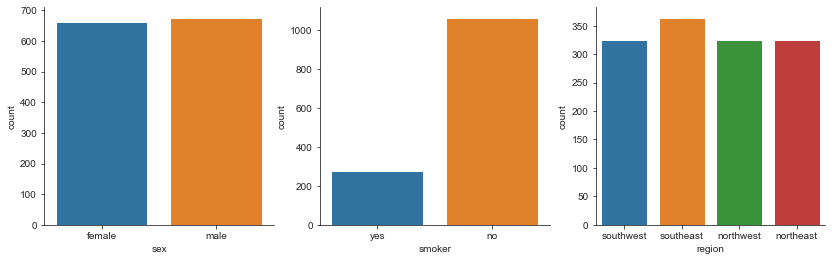

In [14]:
count = 1
# Removal of top and right side of axis
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
# Setting the chart display style
sns.set_style(style="ticks", rc=custom_params)
# Setting the chart size
plt.pyplot.subplots(figsize=(14, 4))

# Loop to make graphs
for col in df[["sex", "smoker", "region"]]:
    plt.pyplot.subplot(1,3, count)
    sns.countplot(df[col])
    count+=1

## Quantitative variables

In [15]:
# Descriptive statistics

df.loc[:,numer].describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [16]:
# Coefficient of variation

"""
The coefficient of variation provides a relative measure of variation 
thus allowing comparison of variables with different units of measurement.

It characterizes the ratio of the intensity of the secondary causes to the primary causes.

Source: Biostatystyka, red. A.Stanisz (book)
"""
def cv(x): return np.std(x) / np.mean(x) * 100
df.loc[:, numer].apply(cv)

age          35.821919
bmi          19.880079
children    110.057777
charges      91.221551
dtype: float64

In [17]:
# Kurtosis

"""
Kurtosis is a measure of outliers. 
The higher its value, the more likely there are outliers in the database. 
The lower the value, the more the results are clustered around the mean.
Safe threshold: K=|3|. 

Source: Biostatystyka, red. A.Stanisz (book)
"""
df.loc[:, numer].apply(kurtosis, bias=False)

age        -1.245088
bmi        -0.050732
children    0.202454
charges     1.606299
dtype: float64

In [18]:
# Skewness

"""
Skewness, in statistics, is the degree of asymmetry observed in a probability distribution.
Distributions can exhibit right (positive) skewness or left (negative) skewness to varying degrees. 
A normal distribution (bell curve) exhibits zero skewness.

The mean of positively skewed data will be greater than the median. 
The mean of negatively skewed data will be less than the median.

Source: https://www.investopedia.com/terms/s/skewness.asp
"""
df.loc[:, numer].apply(skew, bias=False)

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

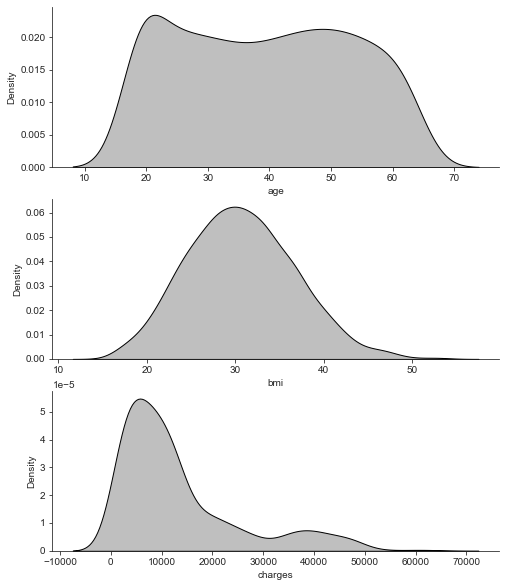

In [19]:
# Density/distribution graphs

count = 1
# Removal of top and right side of axis
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
# Setting the chart display style
sns.set_style(style="ticks", rc=custom_params)
# Setting the chart size
plt.pyplot.subplots(figsize=(8, 10))

# Loop to make graphs
for col in df[["age", "bmi", "charges"]]:
    plt.pyplot.subplot(3,1, count)
    sns.kdeplot(df[col],
                shade=True,
                color='k')
    count+=1

In [68]:
# Test of normality

"""
The Shapiro-Wilk test is a test of normality. 
It is used to determine whether or not a sample comes from a normal distribution.

H0: the distribution of the data --are not-- significantly different from normal distribution.
H1: the distribution of the data --are------ significantly different from normal distribution.

Source: https://www.statology.org/shapiro-wilk-test-python/
"""
# Divide the dataset by category to meet hypothesis testing assumptions.
df_female = df.loc[df.loc[:,"sex"]=="female"]
df_male = df.loc[df.loc[:,"sex"]=="male"]

df_smoker = df.loc[df.loc[:,"smoker"]=="yes"]
df_n_smoker = df.loc[df.loc[:,"smoker"]=="no"]

df_southW = df.loc[df.loc[:,"region"]=="southwest"]
df_southE = df.loc[df.loc[:,"region"]=="southeast"]
df_northW = df.loc[df.loc[:,"region"]=="northwest"]
df_northE = df.loc[df.loc[:,"region"]=="northeast"]

# Database list
data_sets = [df_male, df_female, df_smoker, df_n_smoker, df_southW, df_southE, df_northW, df_northE]

# Empty list for results
pf = []

# Loop for test of normality
for i in data_sets:
    i = i.loc[:,['age', 'bmi', 'charges']].apply(shapiro)
    pf.append(i)

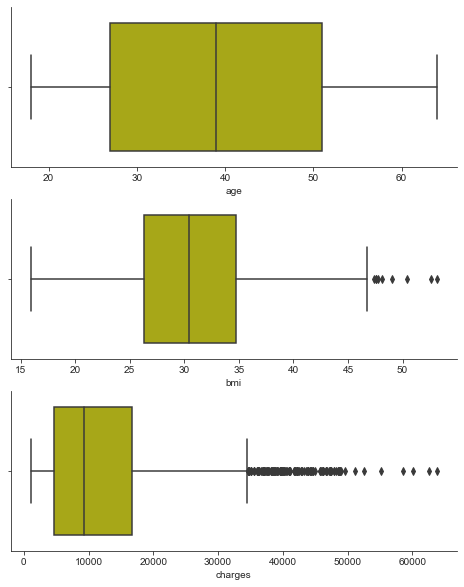

In [31]:
# Outliers

"""
An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. 
In a sense, this definition leaves it up to the analyst to decide what will be considered abnormal. 
Before abnormal observations can be singled out, it is necessary to characterize normal observations.

Source: https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
"""
count = 1
# Removal of top and right side of axis
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
# Setting the chart display style
sns.set_style(style="ticks", rc=custom_params)
# Setting the chart size
plt.pyplot.subplots(figsize=(8, 10))

# Loop to make graphs
for col in df[["age", "bmi", "charges"]]:
    plt.pyplot.subplot(3,1, count)
    sns.boxplot(df[col],
                orient="h",
                color='y')
    count+=1

Text(0.5, 1.0, 'Correlogram')

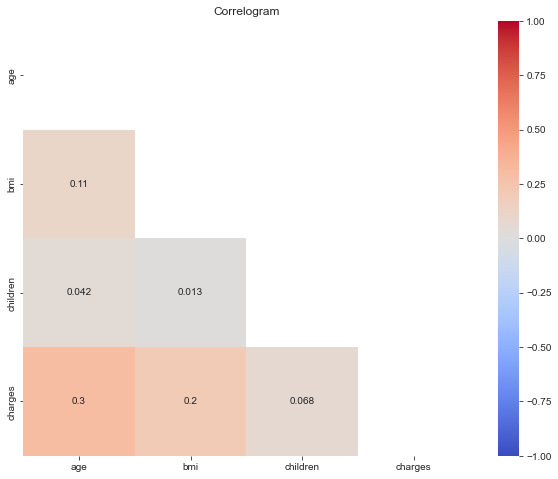

In [32]:
# Pearson’s correlation

"""
Correlation between sets of data is a measure of how well they are related. 
The most common measure of correlation in stats is the Pearson Correlation. 
It shows the linear relationship between two sets of data. 
It is not able to tell the difference between dependent variables and independent variables.

Source: https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/
"""
plt.rcParams['figure.figsize'] = [10, 8]  # for size

sns.heatmap(df.loc[:,numer].corr(), 
            annot=True, 
            cmap='coolwarm', 
            vmax=1, vmin=-1, # cause corr can be in range from 1 to -1
            mask=np.triu(df.loc[:,numer].corr())).set_title("Correlogram")

# Testing statistical hypotheses

------

## whether women and men differ by bmi

In [33]:
df.loc[:,["sex","bmi"]].groupby("sex").mean()

,bmi
sex,
female,30.377749
male,30.943129


In [34]:
print("Male")
print(pf[0])
print()
print("Female")
print(pf[1])

Male
            age       bmi       charges
0  9.438887e-01  0.993048  8.228140e-01
1  2.624835e-15  0.003131  1.178851e-26

Female
            age       bmi       charges
0  9.453153e-01  0.993026  8.053942e-01
1  6.549281e-15  0.003543  1.830528e-27


**The Mann-Whitney U test** is a nonparametric statistical significance test for determining whether two independent samples were drawn from a population with the same distribution. The test determines whether it is equally likely that any randomly selected observation from one sample will be greater or less than a sample in the other distribution [(Source)](https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/).

> H0: the sample distributions are equal. <br />
> H1: the sample distributions are not equal.

$\alpha = 0.05$

In [35]:
mannwhitneyu(df_female[["bmi"]], df_male[["bmi"]])

MannwhitneyuResult(statistic=array([212180.]), pvalue=array([0.10140128]))

**There is no evidence to reject H0.**

## whether women and men differ by bmi smoking

In [36]:
smoker_gender_crosstable = pd.crosstab(df.loc[:, "sex"], df.loc[:, "smoker"])
smoker_gender_crosstable

smoker,no,yes
sex,,
female,547,115
male,517,159


**The Chi-square test of independence** is one of the most useful statistics for testing hypotheses when the variables are nominal, as often happens in clinical research. Unlike most statistics, the Chi-squarecan provide information not only on the significance of any observed differences, but also provides detailed information on exactly which categories account for any differences found. Thus, the amount and detail of information this statistic can provide renders it one of the most useful tools in the researcher’s array of available analysis tools [(Source)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3900058/). 

> H0: the features are independent. <br />
> H1: the features are not independent.

$\alpha = 0.05$

In [37]:
chi2_contingency(smoker_gender_crosstable)

(7.39291081459996,
 0.006548143503580696,
 1,
 array([[526.43348281, 135.56651719],
        [537.56651719, 138.43348281]]))

**We reject H0 in favor of H1.**

## whether women and men differ by charges

In [38]:
df[['sex', 'charges']].groupby("sex").mean()

,charges
sex,
female,12569.578844
male,13956.751178


In [39]:
mannwhitneyu(df_female[["charges"]], df_male[["charges"]])

MannwhitneyuResult(statistic=array([221304.]), pvalue=array([0.72865109]))

**There is no evidence to reject H0.**

## whether smoking differ by bmi

In [40]:
print("Smoker")
print(pf[2])
print()
print("Non smoker")
print(pf[3])

Smoker
            age       bmi       charges
0  9.481711e-01  0.990856  9.395522e-01
1  2.889620e-08  0.085191  3.625188e-09

Non smoker
            age       bmi       charges
0  9.429171e-01  0.994250  8.728628e-01
1  8.044311e-20  0.000421  1.445590e-28


In [42]:
df.loc[:,["smoker","bmi"]].groupby("smoker").mean()

,bmi
smoker,
no,30.651795
yes,30.708449


In [43]:
mannwhitneyu(df_smoker[["bmi"]], df_n_smoker[["bmi"]])

MannwhitneyuResult(statistic=array([146227.5]), pvalue=array([0.9358583]))

**There is no evidence to reject H0.**

## whetherregions differ by charges

In [44]:
print("southwest")
print(pf[4])
print()
print("southeast")
print(pf[5])
print()
print("northwest")
print(pf[6])
print()
print("northeast")
print(pf[7])

southwest
            age       bmi       charges
0  9.407403e-01  0.994927  7.842954e-01
1  4.063502e-10  0.363001  2.023704e-20

southeast
            age       bmi       charges
0  9.451167e-01  0.991089  8.242298e-01
1  2.290088e-10  0.027041  1.232663e-19

northwest
            age       bmi       charges
0  9.386048e-01  0.995464  8.128033e-01
1  2.394839e-10  0.465452  4.268424e-19

northeast
            age       bmi       charges
0  9.445760e-01  0.992033  8.353428e-01
1  1.133527e-09  0.079642  6.552676e-18


In [46]:
df.loc[:,["region", "charges"]].groupby("region").mean()

,charges
region,
northeast,13406.384516
northwest,12417.575374
southeast,14735.411438
southwest,12346.937377


A **Kruskal-Wallis Test** is used to determine whether or not there is a statistically significant difference between the medians of three or more independent groups. It is considered to be the non-parametric equivalent of the One-Way ANOVA [(Source)](https://www.statology.org/kruskal-wallis-test-python/).

> H0: the median is equal across all groups. <br />
> H1: the median is not equal across all groups.

$\alpha = 0.05$

In [47]:
kruskal(df_southW.loc[:, "charges"], 
        df_southE.loc[:, "charges"], 
        df_northW.loc[:, "charges"], 
        df_northE.loc[:, "charges"])

KruskalResult(statistic=4.734181215658743, pvalue=0.19232908072121002)

**There is no evidence to reject H0.**

## ## whether smoking differ by charges

In [128]:
df.loc[:,["smoker","charges"]].groupby("smoker").mean()

,charges
smoker,
no,8434.268298
yes,32050.231832


In [129]:
mannwhitneyu(df_smoker[["charges"]], df_n_smoker[["charges"]])

MannwhitneyuResult(statistic=array([284133.]), pvalue=array([5.27023344e-130]))

**We reject H0 in favor of H1.**

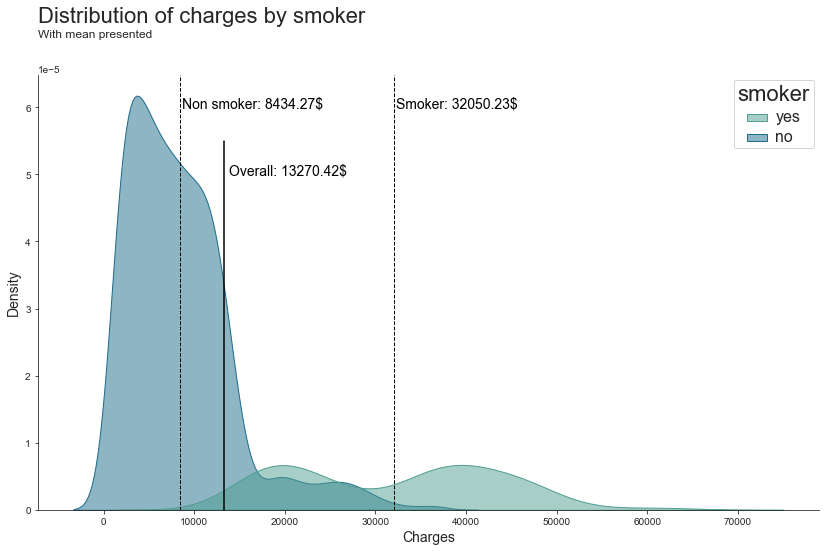

In [130]:
# removal of two axes
custom_params = {"axes.spines.right": False, "axes.spines.top": False} 
# set style for our plot
sns.set_style(style="ticks", rc=custom_params)
# set plot size
plt.pyplot.subplots(figsize=(14, 8))

# main kde plot
ax = sns.kdeplot(df.loc[:, "charges"], 
        hue=df.loc[:, "smoker"], 
        fill=True, 
        palette="crest", 
        alpha=0.5)

# set legend text and title with proper size
plt.pyplot.setp(ax.get_legend().get_texts(), fontsize='16') 
plt.pyplot.setp(ax.get_legend().get_title(), fontsize='22') 

# set text size for y and x axes
plt.pyplot.xlabel("Charges",fontsize=14)
plt.pyplot.ylabel("Density",fontsize=14)

# set title with double enter and add subplot
ax.set_title("Distribution of charges by smoker \n\n", size = 22, loc='left')
plt.pyplot.suptitle(t="With mean presented", ha='left', x=0.125, y = 0.96)

# add line for overall mean ----

# the current y-axis limits in data coordinates
kdeline = ax.get_ylim() 

# add line
ax.plot([df.loc[:, "charges"].mean(), df.loc[:, "charges"].mean()],
    plt.pyplot.ylim(ymin=0, ymax=5.5*1e-5), color='k')

# set y_lim according to the y_lim of the plot    
ax.set_ylim(kdeline)

# add caption for overall mean
plt.pyplot.text(13800, 5*1e-5, 
    "Overall: "+str(np.round(df.loc[:, "charges"].mean(),2))+"$", 
    horizontalalignment='left', 
    size=14, 
    color='black')

# add another line for Smoker
ax.plot([df_smoker.loc[:, "charges"].mean(), df_smoker.loc[:, "charges"].mean()],
    ax.get_ylim(), color='k', linestyle='dashed', linewidth=1)
ax.set_ylim(kdeline)

# add another line for Non Smoker
ax.plot([df_n_smoker.loc[:, "charges"].mean(), df_n_smoker.loc[:, "charges"].mean()],
    ax.get_ylim(), color='k', linestyle='dashed', linewidth=1)
ax.set_ylim(kdeline)

# add caption for Non smoker mean
plt.pyplot.text(8634, 6*1e-5, 
    "Non smoker: "+str(np.round(df_n_smoker.loc[:, "charges"].mean(),2))+"$", 
    horizontalalignment='left', 
    size=14, 
    color='black')

# add caption for Smoker mean
plt.pyplot.text(32250, 6*1e-5, 
    "Smoker: "+str(np.round(df_smoker.loc[:, "charges"].mean(),2))+"$", 
    horizontalalignment='left', 
    size=14, 
    color='black')

plt.pyplot.show()